In [1]:
a = 5 + 5
print(6)

6


<IPython.core.display.Javascript object>


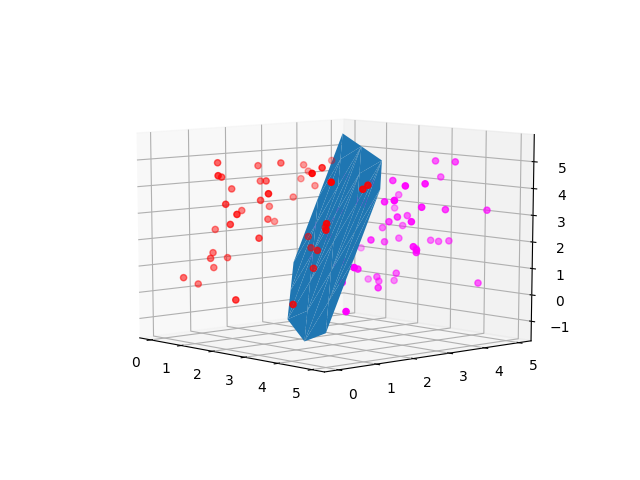

In [7]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from ml_tps.tp3.space_generation import BooleanPlane, Point

POINTS = 100
unit = 7


fig = plt.figure()
ax = fig.gca(projection='3d')

plane = BooleanPlane()

xs = np.arange(unit + 1) * 5 / unit
ys = np.arange(unit + 1) * 5 / unit

points = list(filter(lambda p: -1.5 < p.z < 6, [plane.update_z(Point(x,y,0)) for y in ys for x in xs]))


xss = [p.x for p in points]
yss = [p.y for p in points]
zss = [p.z for p in points]

points = [Point.generate_point() for _ in range(POINTS)]
pointsUP = list(filter(plane.classify, points))
pointsDO = list(filter(lambda p: not plane.classify(p), points))


xsUP = [point.x for point in pointsUP]
ysUP = [point.y for point in pointsUP]
zsUP = [point.z for point in pointsUP]
xsDN = [point.x for point in pointsDO]
ysDN = [point.y for point in pointsDO]
zsDN = [point.z for point in pointsDO]

ax.plot_trisurf(xss, yss, zss)
ax.scatter(xsUP, ysUP, zsUP, c="#FF0000")
ax.scatter(xsDN, ysDN, zsDN, c="#FF00FF")
plt.show()
